In [ ]:
# Print your Emory ID here
print("Emory ID: 2483332")

In [1]:
# Import the necessary libraries and load the data
import pandas as pd

passwords_df = pd.read_csv('passwords.csv')
passwords_df.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


1. An online password attack is when someone tries to hack your account by simply trying a very large number of username/password combinations to access your account. For each `password` in our dataset, the `value` column shows the amount of time it is estimated to take an “online password attack” to hack your account. The column `time_unit` shows the units of that time value (e.g., hours, days, years, etc.). It would be much nicer if our values were of the same units so we can more easily compare the “online password guessing time” for each password. So your first task is to convert all of the values to units of hours (assume the conversion units provided below, e.g., 1 day is 24 hours, 1 week is 168 hours, etc).

In [2]:
# Your answer here 

units = {
    "seconds": 1 / 3600,
    "minutes": 1 / 60,
    "days": 24,
    "weeks": 168,
    "months": 720,
    "years": 8760,
}


# Convert all time values to hours
passwords_df['time_in_hours'] = passwords_df.apply(
    lambda row: row['value'] * units.get(row['time_unit'], 1),
    axis=1
)

# Display the first few rows to check the conversion
passwords_df[['password', 'value', 'time_unit', 'time_in_hours']].head()

,password,value,time_unit,time_in_hours
0,password,6.91,years,60531.600000
1,123456,18.52,minutes,0.308667
2,12345678,1.29,days,30.960000
3,1234,11.11,seconds,0.003086
4,qwerty,3.72,days,89.280000


2. Are there any missing values in the dataset? If so, how many? After you have counted the, please drop them from the dataset.

In [3]:
# Your answer here

# Check for missing values in each column
missing_values = passwords_df.isnull().sum()

# Display columns with missing values and their counts
print("Missing values in each column:\n", missing_values)

# Drop rows with any missing values
passwords_df.dropna(inplace=True)

# Confirm that missing values are dropped by checking again
missing_values_after_drop = passwords_df.isnull().sum()
print("\nMissing values after dropping rows:\n", missing_values_after_drop)


Missing values in each column:
 rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
time_in_hours        7
dtype: int64

Missing values after dropping rows:
 rank                 0
password             0
category             0
value                0
time_unit            0
offline_crack_sec    0
rank_alt             0
strength             0
font_size            0
time_in_hours        0
dtype: int64


3. Which password category has the highest average strength?


In [4]:
# Your answer here

# Calculate the average strength for each password category
category_strength = passwords_df.groupby('category')['strength'].mean()

# Find the category with the highest average strength
highest_avg_strength_category = category_strength.idxmax()
highest_avg_strength_value = category_strength.max()

print(f"The password category with the highest average strength is '{highest_avg_strength_category}' with an average strength of {highest_avg_strength_value}.")


The password category with the highest average strength is 'nerdy-pop' with an average strength of 14.0.


4. What is the rank of the password 'qwerty'?

In [5]:
# Your answer here

qwerty_rank = passwords_df.loc[passwords_df['password'] == 'qwerty', 'rank'].values

if qwerty_rank.size > 0:
    print(f"The rank of the password 'qwerty' is {qwerty_rank[0]}.")
else:
    print("The password 'qwerty' was not found in the dataset.")


The rank of the password 'qwerty' is 5.0.


5. How many passwords have more than 8 characters?

In [6]:
# Your answer here

long_passwords_count = passwords_df[passwords_df['password'].str.len() > 8].shape[0]

print(f"The number of passwords with more than 8 characters is {long_passwords_count}.")


The number of passwords with more than 8 characters is 1.


6. How many passwords do not contain a number?

In [7]:
# Your answer here

no_number_passwords_count = passwords_df[~passwords_df['password'].str.contains(r'\d')].shape[0]

print(f"The number of passwords that do not contain a number is {no_number_passwords_count}.")


The number of passwords that do not contain a number is 446.


7. What is the average time in hours needed to crack these passwords that begin with `123`? How does this compare to the average of all passwords in the dataset?

In [8]:
# Your answer here

# average time in hours for passwords that begin with '123'
average_time_123 = passwords_df[passwords_df['password'].str.startswith('123')]['time_in_hours'].mean()

# average time in hours for all passwords
average_time_all = passwords_df['time_in_hours'].mean()

print(f"The average time in hours to crack passwords beginning with '123' is {average_time_123:.2f} hours.")
print(f"The average time in hours to crack all passwords in the dataset is {average_time_all:.2f} hours.")


The average time in hours to crack passwords beginning with '123' is 107.30 hours.
The average time in hours to crack all passwords in the dataset is 13917.57 hours.


8. What percentage of passwords are of the `simple-alphanumeric` category?

In [9]:
# Your answer here

# Count the number of passwords in the simple-alphanumeric category
simple_alphanumeric_count = passwords_df[passwords_df['category'] == 'simple-alphanumeric'].shape[0]

# Calculate the total number of passwords
total_password_count = passwords_df.shape[0]

# Calculate the percentage
percentage_simple_alphanumeric = (simple_alphanumeric_count / total_password_count) * 100

print(f"The percentage of passwords in the 'simple-alphanumeric' category is {percentage_simple_alphanumeric:.2f}%.")

The percentage of passwords in the 'simple-alphanumeric' category is 12.20%.


9. How many passwords have a strength rating below 5? What is their percentage?

In [10]:
# Your answer here

# Count the number of passwords with a strength rating below 5
low_strength_count = passwords_df[passwords_df['strength'] < 5].shape[0]

# Percentage
percentage_low_strength = (low_strength_count / passwords_df.shape[0]) * 100

print(f"The number of passwords with a strength rating below 5 is {low_strength_count}.")

The number of passwords with a strength rating below 5 is 73.


10. What is the most common password in the dataset?

In [11]:
# Your answer here

# Find the most common password
most_common_password = passwords_df['password'].mode()[0]

print(f"The most common password in the dataset is '{most_common_password}'.")

The most common password in the dataset is '1111'.


11. How many unique passwords are there in each category, and what is their average length?

In [12]:
# Your answer here

# Calculate the number of unique passwords in each category
unique_passwords_per_category = passwords_df.groupby('category')['password'].nunique()

# Calculate the average length of passwords in each category
average_length_per_category = passwords_df.groupby('category')['password'].apply(lambda x: x.str.len().mean())

category_summary = pd.DataFrame({
    'unique_password_count': unique_passwords_per_category,
    'average_password_length': average_length_per_category
})

print(category_summary)


                     unique_password_count  average_password_length
category                                                           
animal                                  29                 6.206897
cool-macho                              79                 6.253165
fluffy                                  44                 5.795455
food                                    11                 6.090909
name                                   183                 6.218579
nerdy-pop                               30                 6.633333
password-related                        15                 6.333333
rebellious-rude                         11                 6.363636
simple-alphanumeric                     61                 5.934426
sport                                   37                 6.513514


12. What is the median rank and strength for passwords of each length?

In [13]:
# Your answer here

# Add a new column for password length
passwords_df['password_length'] = passwords_df['password'].str.len()

# Calculate the median rank and strength for each password length
median_rank_strength_by_length = passwords_df.groupby('password_length').agg(
    median_rank=('rank', 'median'),
    median_strength=('strength', 'median')
)

print(median_rank_strength_by_length)

                 median_rank  median_strength
password_length                              
4                      326.0              6.0
5                      343.0              7.0
6                      231.0              7.0
7                      222.0              8.0
8                      286.0              8.0
9                       49.0              4.0


13. Add a column `strength_label` with values `weak` if strength is below 5, else `strong`. Use a lambda function.

In [14]:
# Your answer here

# Add a column 'strength_label' based on the 'strength' value
passwords_df['strength_label'] = passwords_df['strength'].apply(lambda x: 'weak' if x < 5 else 'strong')

# Display the first few rows to verify
passwords_df[['password', 'strength', 'strength_label']].head()

,password,strength,strength_label
0,password,8.0,strong
1,123456,4.0,weak
2,12345678,4.0,weak
3,1234,4.0,weak
4,qwerty,8.0,strong


14. Create a column `high_value` with a value of `True` if value is in the top 10% of values in the dataset.

In [15]:
# Your answer here

# Calculate the 90th percentile of the 'value' column
top_10_percent_threshold = passwords_df['value'].quantile(0.9)

# Create the 'high_value' column based on the threshold
passwords_df['high_value'] = passwords_df['value'] >= top_10_percent_threshold

# Display the first few rows to verify
passwords_df[['password', 'value', 'high_value']].head()


,password,value,high_value
0,password,6.91,False
1,123456,18.52,True
2,12345678,1.29,False
3,1234,11.11,True
4,qwerty,3.72,False


15. Join all passwords within each `category` into a single string.

In [16]:
# Your answer here

passwords_joined_by_category = passwords_df.groupby('category')['password'].apply(lambda x: ' '.join(x))

print(passwords_joined_by_category)


category
animal                 dragon monkey bigdog falcon phoenix tigers chi...
cool-macho             mustang shadow master harley hunter ranger bus...
fluffy                 love sunshine silver orange ginger summer prin...
food                   pepper cheese coffee banana butter muffin hotd...
name                   michael jennifer jordan superman thomas tigger...
nerdy-pop              starwars computer merlin matrix snoopy boomer ...
password-related       password letmein test pass access gateway plea...
rebellious-rude        biteme freedom secret whatever badboy sexsex b...
simple-alphanumeric    123456 12345678 1234 qwerty 12345 696969 abc12...
sport                  baseball football soccer hockey dallas yankees...
Name: password, dtype: object


**Bonus question 01**: What is the correlation between password length and strength? Create a scatter plot with regression line.

The correlation between password length and strength is 0.26


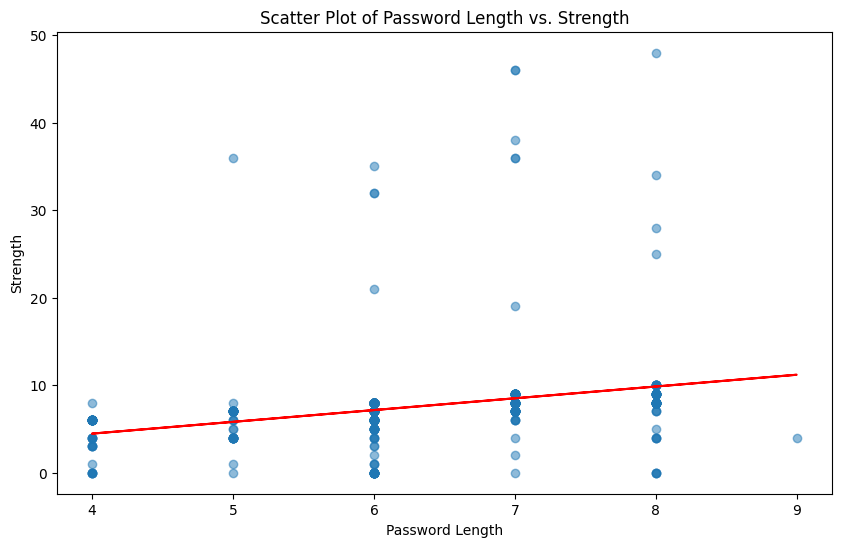

In [18]:
# Your answer here

import matplotlib.pyplot as plt
import numpy as np

passwords_df['password_length'] = passwords_df['password'].str.len()

# Calculate the correlation between password length and strength
correlation = passwords_df['password_length'].corr(passwords_df['strength'])
print(f"The correlation between password length and strength is {correlation:.2f}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(passwords_df['password_length'], passwords_df['strength'], alpha=0.5)

# Add a regression line
m, b = np.polyfit(passwords_df['password_length'], passwords_df['strength'], 1)
plt.plot(passwords_df['password_length'], m*passwords_df['password_length'] + b, color='red')

# Add labels and title
plt.title('Scatter Plot of Password Length vs. Strength')
plt.xlabel('Password Length')
plt.ylabel('Strength')
plt.show()


**Bonus question 02**: Find all passwords with palindromes.

In [19]:
# Your answer here

# Identify palindromic passwords
palindromic_passwords = passwords_df[passwords_df['password'] == passwords_df['password'].str[::-1]]

# Display the palindromic passwords
print("Palindromic passwords:")
print(palindromic_passwords[['password']])

Palindromic passwords:
     password
18     111111
59     666666
76       1111
105    aaaaaa
144    xxxxxx
190    hannah
192  11111111
206   7777777
277    222222
285  xxxxxxxx
286    777777
291  88888888
314      2112
324      7777
352    zzzzzz
364    555555
371      2222
373      4444
409     11111
413    123321
420    999999
458    333333
472      xxxx
489    888888
